###### Import here

In [196]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, ElasticNet, Ridge, HuberRegressor,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from numpy import asarray
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import math
from sklearn.pipeline import make_pipeline

# Other models

In [100]:
df = pd.read_pickle("cleaned.pkl")
df = df.drop(["x","y","z"], axis=1)

<AxesSubplot:xlabel='carat', ylabel='price'>

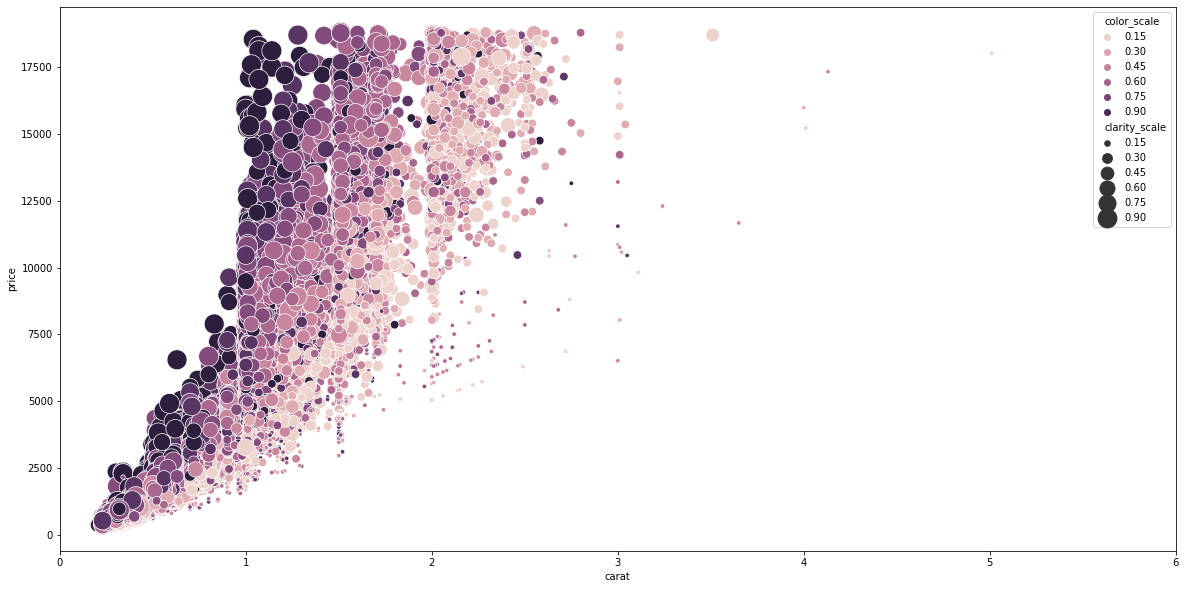

In [101]:
plt.figure(figsize=(20,10))
plt.xlim(right=6)
sns.scatterplot(data = df, x = "carat", y ="price", hue = "color_scale", size = "clarity_scale", sizes=(20, 400))

### Now we are looking for outliers

<AxesSubplot:xlabel='table'>

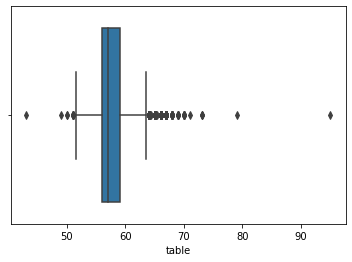

In [50]:
sns.boxplot(x=df['table'])

<AxesSubplot:xlabel='depth'>

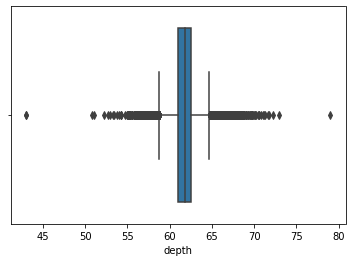

In [51]:
sns.boxplot(x=df['depth'])

<AxesSubplot:xlabel='carat'>

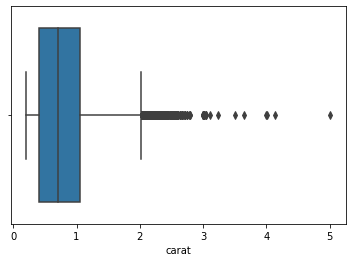

In [52]:
sns.boxplot(x=df['carat'])

<AxesSubplot:xlabel='price'>

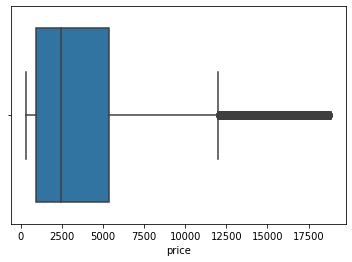

In [53]:
sns.boxplot(x=df['price'])

**Observations on the Outliers:**
<br>We see a few outliers that if we take into consideration may not be very helpful in making our estimate. In light of how rare and how expensive some diamonds are we don't want those "special" cases to affect our predictions for the "normal" diamond market. 

----------
## Here we started to look for outliers so that we could take 'em outside and you know...deal with 'em.

***But they caused our RMSE to double. We left them here for posterity.***

In [102]:
z = np.abs(stats.zscore(df))
z_out = np.where(z > 4)
len(z_out[0])

270

In [103]:
Q1 = df.drop(["id"], axis=1).quantile(0.25)
Q3 = df.drop(["id"], axis=1).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat               0.65
depth               1.50
table               3.00
price            4408.50
cut_scale           0.40
color_scale         0.42
clarity_scale       0.25
dtype: float64


Let's look at the ***carat quantile***

In [9]:
print(df['carat'].quantile(0.50)) 
print(df['carat'].quantile(0.95)) 


0.7
1.71


***We are changing the values of the outliers in the carats carategory***

In [10]:
df['carat'] = np.where(df['carat'] > 1.51, 0.7, df['carat'])

In [11]:
Q1 = df.drop(["id"], axis=1).quantile(0.25)
Q3 = df.drop(["id"], axis=1).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat               0.60
depth               1.50
table               3.00
price            4408.50
cut_scale           0.40
color_scale         0.42
clarity_scale       0.25
dtype: float64


Adjusting the ***price outliers*** might show the biggest difference

In [56]:
print(df['price'].quantile(0.50))
print(df['price'].quantile(0.95))

2428.0
13172.799999999974


***We are changing the values of the outliers in the price category***

In [57]:
df['price'] = np.where(df['price'] > 13172, 2428, df['price'])

In [58]:
Q1 = df.drop(["id"], axis=1).quantile(0.25)
Q3 = df.drop(["id"], axis=1).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat               0.65
depth               1.50
table               3.00
price            3725.00
cut_scale           0.40
color_scale         0.42
clarity_scale       0.25
dtype: float64


That might have done us a ***big*** favor.

In [ ]:
print(df['price'].quantile(0.50))
print(df['price'].quantile(0.95))

In [ ]:
df['price'] = np.where(df['price'] > 13172, 2428, df['price'])

In [ ]:
Q1 = df.drop(["id"], axis=1).quantile(0.25)
Q3 = df.drop(["id"], axis=1).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

<AxesSubplot:xlabel='carat', ylabel='price'>

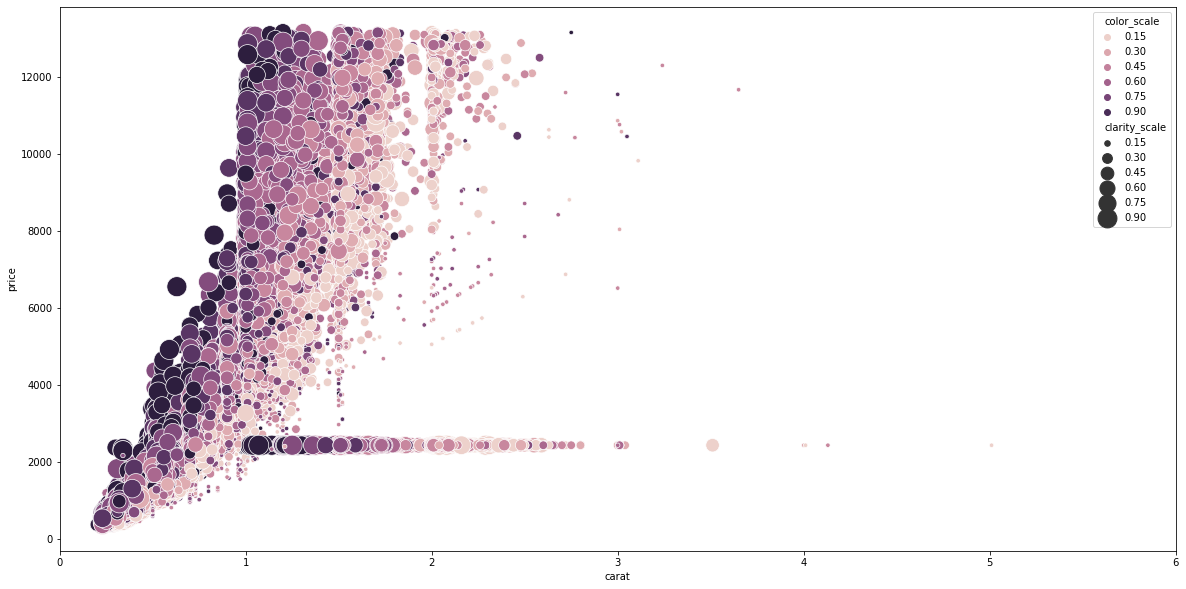

In [59]:
plt.figure(figsize=(20,10))
plt.xlim(right=6)
sns.scatterplot(data = df, x = "carat", y ="price", hue = "color_scale", size = "clarity_scale", sizes=(20, 400))

***This might have deeformed my data***

# Train-Test-Split

In [104]:
# We are separating out the "data" from the "target"
X = pd.DataFrame(df.drop(['price'], axis=1))
y = pd.DataFrame(df["price"])

In [105]:
# We will separate our "train" and "test" groups
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

## Restart Linear Regression

In [106]:
lr = LinearRegression()

In [107]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32364, 7)
(8091, 7)
(32364, 1)
(8091, 1)


In [109]:
lr.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred = lr.predict(X_test)

In [111]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [[ 1.51601800e-04  8.84252502e+03 -4.04444746e+01 -2.51955293e+01
   6.32700958e+02  2.27814236e+03  4.23098818e+03]]
MSE:  1516944.74
Coef of Determ (1 is perfect): 0.90
RMSE: 1231.64


In [68]:
params = {
    "copy_X": True,
    "fit_intercept": True,
    "n_jobs": None,
    "normalize": False
}

# Ridge

In [112]:
r = Ridge()

In [113]:
r.fit(X_train, y_train)

Ridge()

In [114]:
y_pred = r.predict(X_test)

In [115]:
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1516802.60
Coef of Determ (1 is perfect): 0.90
RMSE: 1231.59


# Ridge CV

In [116]:
rcv = RidgeCV()

In [117]:
rcv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [118]:
y_pred = rcv.predict(X_test)

In [119]:
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1516955.86
Coef of Determ (1 is perfect): 0.90
RMSE: 1231.65


# LASSO

In [120]:
ls = Lasso(alpha=0.1)

In [121]:
ls.fit(X_train,y_train)

Lasso(alpha=0.1)

In [122]:
y_pred = ls.predict(X_test)

In [123]:
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1516845.00
Coef of Determ (1 is perfect): 0.90
RMSE: 1231.60


# Elastic Net

In [124]:
en = ElasticNet(alpha =0.001)

In [125]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [126]:
y_pred = en.predict(X_test)

In [127]:
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1515028.21
Coef of Determ (1 is perfect): 0.90
RMSE: 1230.86


**Whoa! At least we know it works, just not in the right way!** <br>3000 RMSE with alpha set at 0.1
<br> We went back to set alpha at 0.001

# Huber Regressor

In [185]:
hr = HuberRegressor(epsilon=2)

In [188]:
hr.fit(X_train, y_train.values.ravel())

HuberRegressor(epsilon=2)

In [189]:
hr.score(X_train, y_train)

0.9006310552158692

In [191]:
y_pred = hr.predict(X_test)

In [192]:
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1618464.85
Coef of Determ (1 is perfect): 0.90
RMSE: 1272.19


# SGDRegressor

In [197]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))

In [198]:
reg.fit(X, y)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [199]:
y_pred = reg.predict(X_test)

In [200]:
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1583154.91
Coef of Determ (1 is perfect): 0.90
RMSE: 1258.23


# Reset with selected columns

In [201]:
# we are going to start reducing our dataset
df_reduced = df[["carat", "price","color_scale","clarity_scale"]]

In [202]:
X = pd.DataFrame(df_reduced.drop(['price'], axis=1))
y = pd.DataFrame(df_reduced["price"])

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [204]:
lr = LinearRegression()

In [205]:
lr.fit(X_train, y_train)

LinearRegression()

In [206]:
y_pred = lr.predict(X_test)

In [207]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [[8785.25807281 2241.62098832 4387.69179684]]
MSE:  1565869.43
Coef of Determ (1 is perfect): 0.90
RMSE: 1251.35
